### MC star experiment step by step

Starting from a star graph apply the simulated annealing heuristic. store the topologies and plot the progress in regular steps.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pickle
import sys

%load_ext autoreload
%autoreload 2

sys.path.append('../../ready functions in py/')

from mc_update import monte_carlo_step
from helper_fcts import generate_random_bot_problem
from iterative_BOT_solver import iterative_bot_solver

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
seed=199
np.random.seed(seed)
num_terminals = 100

cost_arr = np.array([])
topo_dict = {}

num_sources = np.random.randint(1, num_terminals)
num_sinks = num_terminals - num_sources
bot_problem_dict = generate_random_bot_problem(num_sources, num_sinks, normalised_to=1, dim=2,
                                                       max_length=1.)

al = bot_problem_dict["al"]
coords_sources = bot_problem_dict["coords_sources"]
coords_sinks = bot_problem_dict["coords_sinks"]
supply_arr = bot_problem_dict["supply_arr"]
demand_arr = bot_problem_dict["demand_arr"]

# init star graph:
topo = nx.Graph()
for node in range(len(supply_arr) + len(demand_arr)):
    topo.add_edge(-1, node)
    
topo_dict[0] = topo.copy()

cost, coords_iter = iterative_bot_solver(topo, supply_arr, demand_arr, coords_sources, coords_sinks, al,
                                         relative_improvement_threshold=1e-6, min_iterations=-1,
                                         max_iterations=1000,
                                         plot=False, title="", fov=None, save=False, save_name="img")

cost_arr = np.append(cost_arr, cost)
# MC iterations:
iteration = 0
T=0
sample_edge_list = list(topo.edges())
keep_going = True
while keep_going and iteration < 60000:
    iteration += 1
    topo, sample_edge_list, cost, coords_iter, accepted = monte_carlo_step(topo, sample_edge_list, cost,
                                    coords_iter, bot_problem_dict, temperature=T)
    cost_arr = np.append(cost_arr, cost)
    topo_dict[iteration] = topo.copy()
    
    # check if converged:
    if len(sample_edge_list) == 0:
        # this means that we have stuck with one topology for an entire run through.
        keep_going = False
    
    if iteration % 500 == 0:
        print(f"{iteration} iterations.")
        
# store the results in a pickle file:
results_dict = {"cost_arr":cost_arr, "topo_dict":topo_dict}
pkl_file_path = f"stepMC_star_seed{seed}.pkl"
output = open(pkl_file_path, 'wb')
pickle.dump(results_dict, output)
output.close()

500 iterations.
1000 iterations.
1500 iterations.
2000 iterations.
2500 iterations.


In [6]:
seed=138
np.random.seed(seed)
num_terminals = 100

num_sources = np.random.randint(1, num_terminals)
num_sinks = num_terminals - num_sources
bot_problem_dict = generate_random_bot_problem(num_sources, num_sinks, normalised_to=1, dim=2,
                                                       max_length=1.)

al = bot_problem_dict["al"]
coords_sources = bot_problem_dict["coords_sources"]
coords_sinks = bot_problem_dict["coords_sinks"]
supply_arr = bot_problem_dict["supply_arr"]
demand_arr = bot_problem_dict["demand_arr"]

In [4]:
seed=138
pkl_file_path = pkl_file_path = f"MC images/{seed}/stepMC_star_seed{seed}.pkl"
pkl_file = open(pkl_file_path, 'rb')
results_dict = pickle.load(pkl_file)
pkl_file.close()
cost_arr = results_dict["cost_arr"]
topo_dict = results_dict["topo_dict"]

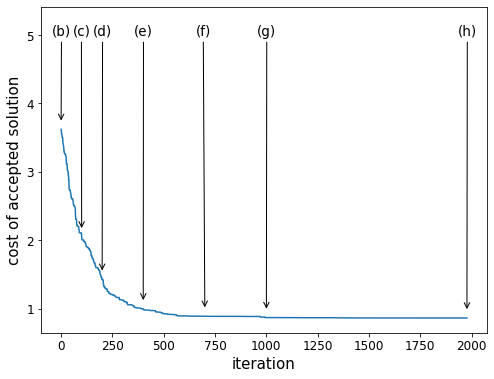

In [8]:
interval = [0,100,200,400,700,1000,len(cost_arr)-1]
l = ["(b)","(c)","(d)","(e)","(f)","(g)","(h)"]

plt.figure(figsize=(8,6))
plt.plot(np.arange(len(cost_arr)), cost_arr)
plt.xlabel("iteration",fontsize = 15)
plt.ylabel("cost of accepted solution",fontsize = 15)
#for i in interval:
#    plt.axvline(i, ymin=cost_arr[i]/5, ymax = 0.8, color="k")
plt.scatter(0,5.2, color="w")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i,_ in enumerate(interval):
    plt.annotate(l[i], xy=(interval[i], cost_arr[interval[i]] + 0.1), xytext=(interval[i]-45, 5), fontsize=13.5, arrowprops=dict(arrowstyle="->"))
#plt.savefig(f"MCcost{seed}.pdf")
plt.show()

In [7]:
len(interval)

20

1300


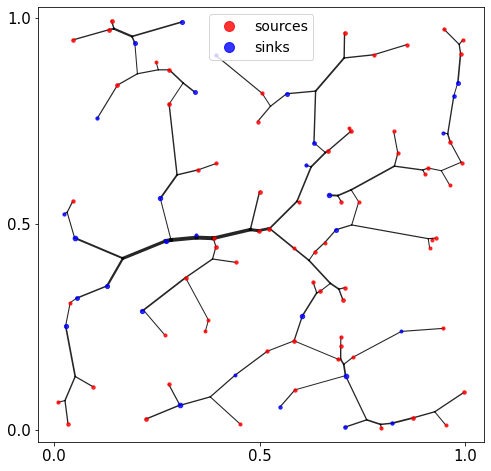

1600


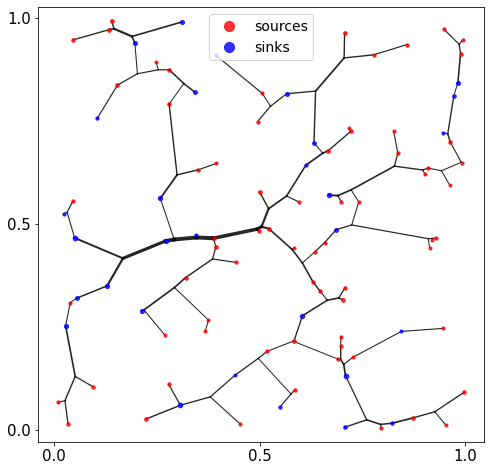

In [8]:
interval = [0,10,20,30,40,50,60,70,80,90,100,150,200,300,400,500,600,700,1000,len(cost_arr)-1]
interval = [1300,1600]
count = 0
for i,_ in enumerate(topo_dict):
    if i not in interval:
        continue
    print(i)
    count +=1
    topo = topo_dict[i]
    
    _ = iterative_bot_solver(topo, supply_arr, demand_arr, coords_sources, coords_sinks, al,
                                         relative_improvement_threshold=1e-6, min_iterations=-1,
                                         max_iterations=1000,
                                         plot=True, title="", fov=None, save=True, save_name=f"img3{count}_seed{seed}")

In [28]:
# print loss and evolution next to each other:

interval = [0,10,20,30,40,50,60,70,80,90,100,150] + [200 + 50 * x for x in range(36)] + [len(cost_arr)-1]

interval = [1,10,20]

for i in interval:
    plt.figure()
    plt.suptitle(f"Zero-temperature heuristic after iteration={i}\n", fontsize=20)
    
    plt.subplot(121, figsize=(8,6))
    plt.title("Decreasing cost", fontsize=15)
    plt.plot(np.arange(i), cost_arr[:i])
    plt.xlabel("iteration", fontsize=13)
    plt.ylabel("cost of accepted solution", fontsize=13)
    plt.xlim(0,len(cost_arr) + 5)
    plt.ylim(np.min(cost_arr) - 0.1, np.max(cost_arr) + 0.1)
    
    topo = topo_dict[i]
    
    plt.subplot(122)
    plt.title("Accepted solution", fontsize=15)
    _ = iterative_bot_solver(topo, supply_arr, demand_arr, coords_sources, coords_sinks, al,
                                         relative_improvement_threshold=1e-6, min_iterations=-1,
                                         max_iterations=1000,
                                         plot=True, title="", fov=None, save=False, save_name=f"img")

    plt.savefig(f"MC{i}.pdf")
    plt.show()

AttributeError: 'AxesSubplot' object has no property 'figsize'

<Figure size 432x288 with 0 Axes>

In [6]:

interval

[0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 150,
 200,
 250,
 300,
 350,
 400,
 450,
 500,
 550,
 600,
 650,
 700,
 750,
 800,
 850,
 900,
 950,
 1000,
 1050,
 1100,
 1150,
 1200,
 1250,
 1300,
 1350,
 1400,
 1450,
 1500,
 1550,
 1600,
 1650,
 1700,
 1750,
 1800,
 1850,
 1900,
 1950]